In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from datetime import datetime
import math

In [2]:
docentes_file = '../data/docentes_periodo.csv'
eval_docentes_file = '../data/eval_docentes_periodo.csv'
materias_file = '../data/mat_cursadas_rend_académico.csv'
perfil_file = '../data/perfil_ingreso.csv'
rendimiento_file = '../data/rendimiento_académico.csv'

In [3]:
teachers_by_period = pd.read_csv(docentes_file, delimiter = ';', encoding = "ISO-8859-1")
teachers_assessment = pd.read_csv(eval_docentes_file, delimiter = ';', encoding = "ISO-8859-1")
subjects = pd.read_csv(materias_file, delimiter = ';', encoding = "ISO-8859-1")
student_profile = pd.read_csv(perfil_file, delimiter = ';', encoding = "ISO-8859-1")
student_performance = pd.read_csv(rendimiento_file, delimiter = ';', encoding = "ISO-8859-1")

In [4]:
teachers_assessment['CALIFICACION'] = teachers_assessment['CALIFICACION'].str.replace(',','.')
teachers_assessment['CALIFICACION'] = teachers_assessment['CALIFICACION'].astype('float64')

In [5]:
teachers=teachers_assessment.groupby('COD_DOCENTE')[['CALIFICACION']].mean().sort_values('CALIFICACION', ascending = True)
teachers = teachers.reset_index()

In [6]:
teachers_by_period['COD_DOCENTE'] = teachers_by_period['COD_DOCENTE'].astype('str')

In [7]:
student_performance['COD_DOCENTE'] = np.nan

In [8]:
# DO NOT RUN THIS CELL!!!!!!!!!!!!!!!!!
for idx in range(0, len(student_performance)):
    cod_mat = student_performance.loc[idx, 'COD_MAT']
    periodo = student_performance.loc[idx, 'PERIODO_COHORTE']
    
    
    try:
        cod_docente = teachers_by_period[(teachers_by_period['COD_MAT'] == cod_mat) & \
                                        (teachers_by_period['PERIODO'] == periodo)]['COD_DOCENTE'].values[0]
    except:
        cod_docente = np.nan
    
    student_performance.loc[idx, 'COD_DOCENTE'] = cod_docente

In [11]:
df_reprobados = student_performance[student_performance['ESTADO'] == 'NO APROBADA' ]

In [12]:
df_reprobados_docente = df_reprobados.groupby('COD_DOCENTE')[['ESTADO']].count().sort_values('ESTADO',ascending = False)
df_reprobados_docente = df_reprobados_docente.reset_index()
df_reprobados_docente.columns = ['COD_DOCENTE', 'num_reprobados']
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados
0,3168,443
1,613,412
2,2925,356
3,3313,346
4,2927,338


In [13]:
df_reprobados_docente['CALIFICACION'] = np.nan

In [14]:
for idx in range(0, len(df_reprobados_docente)):
    cod_docente = int(df_reprobados_docente.loc[idx, 'COD_DOCENTE'])
    
    
    try:
        calificacion = teachers[(teachers['COD_DOCENTE'] == cod_docente)]['CALIFICACION'].values[0]
    except:
        calificacion = np.nan
    
    df_reprobados_docente.loc[idx, 'CALIFICACION'] = calificacion

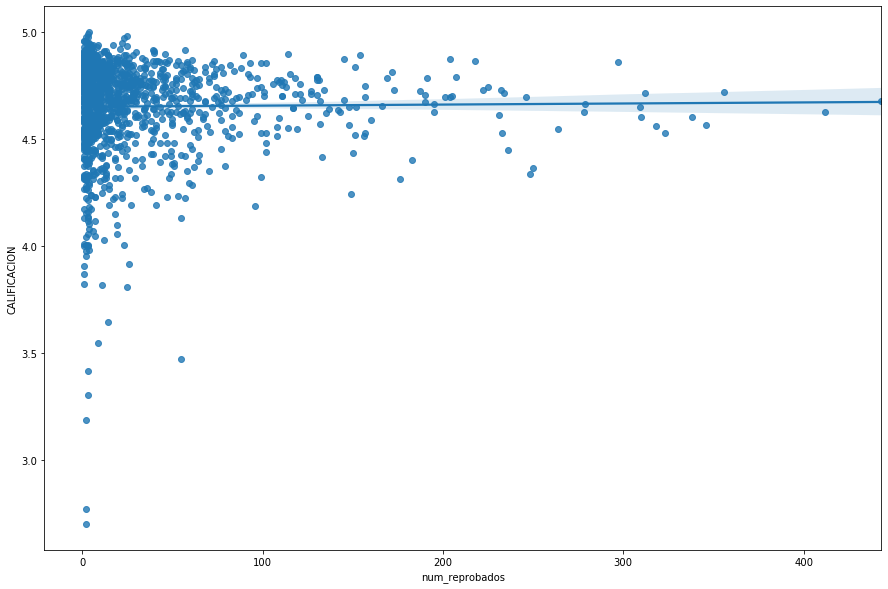

In [15]:
fig, axes = plt.subplots(figsize = (15, 10))

sns.regplot(x="num_reprobados", y="CALIFICACION", data=df_reprobados_docente)